# Домашнее задание к лекции "Базовые понятия статистики"

**Обязательная часть**

Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики.

# Задание 1. Базовое изучение

Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). 
Провести расчет базовых метрик для них, кратко описать результаты.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('horse_data.csv',
                names=['1.surgery', '2.Age', '3.Hospital Number', '4.rectal temperature', '5.pulse', '6.respiratory rate', '7.temperature of extremities', '8.peripheral pulse', '9.mucous membranes', '10.capillary refill time', '11.pain', '12.peristalsis', '13.abdominal distension', '14.nasogastric tube', '15.nasogastric reflux', '16.nasogastric reflux PH', '17.rectal examination', '18.abdomen', '19.packed cell volume', '20.total protein', '21.abdominocentesis appearance', '22.abdomcentesis total protein', '23.outcome', '24.surgical lesion?', '25.type of lesion-1', '26.type of lesion-2', '27.type of lesion-3', '28.cp_data'])
df.head()

,1.surgery,2.Age,3.Hospital Number,4.rectal temperature,5.pulse,6.respiratory rate,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time,...,19.packed cell volume,20.total protein,21.abdominocentesis appearance,22.abdomcentesis total protein,23.outcome,24.surgical lesion?,25.type of lesion-1,26.type of lesion-2,27.type of lesion-3,28.cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   1.surgery                       300 non-null    object
 1   2.Age                           300 non-null    int64 
 2   3.Hospital Number               300 non-null    int64 
 3   4.rectal temperature            300 non-null    object
 4   5.pulse                         300 non-null    object
 5   6.respiratory rate              300 non-null    object
 6   7.temperature of extremities    300 non-null    object
 7   8.peripheral pulse              300 non-null    object
 8   9.mucous membranes              300 non-null    object
 9   10.capillary refill time        300 non-null    object
 10  11.pain                         300 non-null    object
 11  12.peristalsis                  300 non-null    object
 12  13.abdominal distension         300 non-null    ob

In [4]:
df.describe()

,2.Age,3.Hospital Number,24.surgical lesion?,25.type of lesion-1,26.type of lesion-2,27.type of lesion-3,28.cp_data
count,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.640000,1.085889e+06,1.363333,3657.880000,90.226667,7.363333,1.670000
std,2.173972,1.529801e+06,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,5.184760e+05,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.289040e+05,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,5.303055e+05,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,1.000000,5.347275e+05,2.000000,3209.000000,0.000000,0.000000,2.000000
max,9.000000,5.305629e+06,2.000000,41110.000000,7111.000000,2209.000000,2.000000


Во многих столбцах попадаются пропуски. Пропуски обозначены "?", что мешает провести первичный анализ датасета.
Заменим "?" на NaN.

In [5]:
df_nan = df.replace('?', np.nan)

In [6]:
df_nan = df_nan.apply(pd.to_numeric)

In [7]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   1.surgery                       299 non-null    float64
 1   2.Age                           300 non-null    int64  
 2   3.Hospital Number               300 non-null    int64  
 3   4.rectal temperature            240 non-null    float64
 4   5.pulse                         276 non-null    float64
 5   6.respiratory rate              242 non-null    float64
 6   7.temperature of extremities    244 non-null    float64
 7   8.peripheral pulse              231 non-null    float64
 8   9.mucous membranes              253 non-null    float64
 9   10.capillary refill time        268 non-null    float64
 10  11.pain                         245 non-null    float64
 11  12.peristalsis                  256 non-null    float64
 12  13.abdominal distension         244 

In [8]:
df_nan1 = df_nan[['1.surgery', '2.Age', '4.rectal temperature', '5.pulse', '7.temperature of extremities', '8.peripheral pulse', '9.mucous membranes', '10.capillary refill time']]
df_nan1.head()

,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
0,2.0,1,38.5,66.0,3.0,3.0,NaN,2.0
1,1.0,1,39.2,88.0,NaN,NaN,4.0,1.0
2,2.0,1,38.3,40.0,1.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,4.0,1.0,6.0,2.0
4,2.0,1,37.3,104.0,NaN,NaN,6.0,2.0


In [9]:
df_nan1.describe()

,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
count,299.000000,300.000000,240.000000,276.000000,244.000000,231.000000,253.000000,268.000000
mean,1.397993,1.640000,38.167917,71.913043,2.348361,2.017316,2.853755,1.305970
std,0.490305,2.173972,0.732289,28.630557,1.045054,1.042428,1.620294,0.477629
min,1.000000,1.000000,35.400000,30.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,3.000000,2.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,3.000000,3.000000,4.000000,2.000000
max,2.000000,9.000000,40.800000,184.000000,4.000000,4.000000,6.000000,3.000000


In [10]:
#дискретные величины. Остальные данные - категории.
print(df_nan1[['2.Age', '4.rectal temperature', '5.pulse']].median())

2.Age                    1.0
4.rectal temperature    38.2
5.pulse                 64.0
dtype: float64


**В выбранных столбцах обнаружено:  
    5.пульс - скорее всего имеются выбросы, максимальный пульс 184, при нормальном 30-40. Медиана 64, 75% выборки менее 88.   
    10.время пополнения капилляров - по условию может быть либо 1, либо 2. В данных опечатка - максимальное значение 3.**

# Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

***Построим boxplot распределения для ПУЛЬСА***

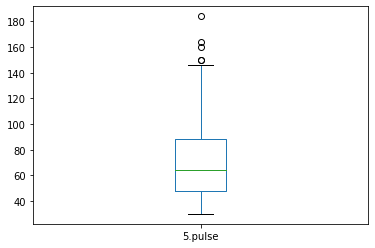

In [11]:
df_nan1['5.pulse'].plot(kind='box')

***найдем выбросы через межкваритльный размах***

In [12]:
q1 = df_nan1['5.pulse'].quantile(0.25)
q3 = df_nan1['5.pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f'{lower_bound} нижняя граница')
print(f'{upper_bound} нижняя граница')

-12.0 нижняя граница
148.0 нижняя граница


In [13]:
df_pulse = df_nan1[df_nan1['5.pulse']>upper_bound]
df_pulse.head()

,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
3,1.0,9,39.1,164.0,4.0,1.0,6.0,2.0
41,2.0,9,39.0,150.0,NaN,NaN,NaN,NaN
55,1.0,9,38.6,160.0,3.0,NaN,5.0,1.0
255,1.0,9,38.8,184.0,1.0,NaN,1.0,1.0
275,1.0,9,38.8,150.0,1.0,3.0,6.0,2.0


Изучив несколько сайтов по физиологии лошадей, я решил оставить данные значения, т.к., например, для соревнований лошадь тренеруют при пульсе до 160 уд.мин. Возможно, 184 уд в минуту получено после сильного упомления, к тому же всем лошадям 9 лет.

Обращаем внимание, что в колнке возраст допустимые значения: Age 1 = Adult horse, 2 = Young (< 6 months)

**проработаем колонку с возрастом**

In [14]:
print(df_nan1['2.Age'].unique())

[1 9]


In [15]:
# заменим 9 на 1, т.е. взрослая лошадь
df_nan1['2.Age'] = df_nan1['2.Age'].replace(9, 1)

C:\Users\Dmitry\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


***обработаем выбросы в поле "Время заполнения капилляров"***

In [16]:
df_crt = df_nan1[df_nan1['10.capillary refill time']==3]
df_crt

,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
78,1.0,1,NaN,NaN,3.0,3.0,3.0,3.0
85,2.0,1,38.0,54.0,2.0,3.0,3.0,3.0


возможное значение по описанию датасета:  
   1 = < 3 секунд  
   2 = >= 3 секунды  
Делаю предположение, что сотрудники по ошибки поставили время заполнения в секундах, т.е. 3 секунды нужно заменить на категорию 2.

In [17]:
#df_nan1.loc[df_nan1['10.capillary refill time'] == 3.0, '10.capillary refill time'] = 2

df_nan1['10.capillary refill time'] = df_nan1['10.capillary refill time'].replace(3, 2)
print(max(df_nan1['10.capillary refill time']))

2.0


C:\Users\Dmitry\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


***проверим поле "Ректальная температура"***

In [18]:
q1_t = df_nan1['4.rectal temperature'].quantile(0.25)
q3_t = df_nan1['4.rectal temperature'].quantile(0.75)
iqr_t = q3_t - q1_t
lower_bound_t = q1_t - (1.5 * iqr_t)
upper_bound_t = q3_t + (1.5 * iqr_t)
print(f'{lower_bound_t} нижняя граница')
print(f'{upper_bound_t} нижняя граница')

36.74999999999999 нижняя граница
39.550000000000004 нижняя граница


In [19]:
df_temp = df_nan1[df_nan1['4.rectal temperature']>upper_bound_t]
df_temp

,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
20,1.0,1,39.9,72.0,1.0,1.0,5.0,2.0
54,2.0,1,40.3,114.0,3.0,3.0,1.0,2.0
75,1.0,1,39.7,100.0,3.0,3.0,5.0,2.0
91,2.0,1,40.3,114.0,3.0,3.0,1.0,2.0
99,2.0,1,39.6,108.0,3.0,3.0,6.0,2.0
259,1.0,1,40.8,72.0,3.0,3.0,1.0,1.0
281,2.0,1,40.0,78.0,3.0,3.0,5.0,1.0


Не смотря на то, что несколько показаний температуры живоных вышли за пределы доверительного интервала, как-то обрабатывать их не будем.
Такая температура вполне может быть. Обычно повышение температуры до 42 градусов свидетельствует об инфекционном заболевании.

# Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [20]:
df_replace = df_nan1
df_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   1.surgery                     299 non-null    float64
 1   2.Age                         300 non-null    int64  
 2   4.rectal temperature          240 non-null    float64
 3   5.pulse                       276 non-null    float64
 4   7.temperature of extremities  244 non-null    float64
 5   8.peripheral pulse            231 non-null    float64
 6   9.mucous membranes            253 non-null    float64
 7   10.capillary refill time      268 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


**поработаем со столбцом 1.surgery**

In [21]:
#Если мы не знаем, была ли операция, то ставим 2 - операции не было
df_replace['1.surgery'].fillna(2, inplace=True)
df_replace['1.surgery'].fillna(2).isna().sum()

C:\Users\Dmitry\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

**Температура**

мы знаем о корреляции ректальной температуры с температурой конечностей

In [22]:
print(df_replace['4.rectal temperature'].mean())
print(df_replace['4.rectal temperature'].median())
print(df_replace['4.rectal temperature'].mode()[0])

38.16791666666669
38.2
38.0


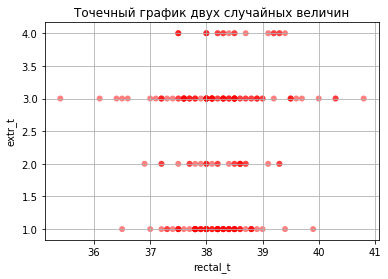

In [23]:
rectal_t = df_replace['4.rectal temperature']
extr_t = df_replace['7.temperature of extremities']
fig, ax = plt.subplots()
ax.scatter(rectal_t, extr_t, c='red', alpha=0.5, edgecolors='none')

ax.grid(True)
plt.xlabel('rectal_t')
plt.ylabel('extr_t')
plt.title('Точечный график двух случайных величин')
plt.show()

каких-то сильно выраженных зависимостей на графике не наблюдается  
удалим строки с пустыми значениями.  
разделим датасет на группы по температуре конечностей и найдем среднюю ректальную температуру

In [24]:
df_replace_t = df_replace[['4.rectal temperature','7.temperature of extremities']]
df_replace_t.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 298
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   4.rectal temperature          198 non-null    float64
 1   7.temperature of extremities  198 non-null    float64
dtypes: float64(2)
memory usage: 4.6 KB


In [25]:
df_replace_t1 = df_replace_t[df_replace_t['7.temperature of extremities']==1]
df_replace_t2 = df_replace_t[df_replace_t['7.temperature of extremities']==2]
df_replace_t3 = df_replace_t[df_replace_t['7.temperature of extremities']==3]
df_replace_t4 = df_replace_t[df_replace_t['7.temperature of extremities']==4]

In [26]:
print(f'1: среднее-{df_replace_t1["4.rectal temperature"].mean()}, медиана-{df_replace_t1["4.rectal temperature"].median()}, мода-{df_replace_t1["4.rectal temperature"].mode()[0]}')
print(f'1: среднее-{df_replace_t2["4.rectal temperature"].mean()}, медиана-{df_replace_t2["4.rectal temperature"].median()}, мода-{df_replace_t2["4.rectal temperature"].mode()[0]}')
print(f'1: среднее-{df_replace_t3["4.rectal temperature"].mean()}, медиана-{df_replace_t3["4.rectal temperature"].median()}, мода-{df_replace_t3["4.rectal temperature"].mode()[0]}')
print(f'1: среднее-{df_replace_t4["4.rectal temperature"].mean()}, медиана-{df_replace_t4["4.rectal temperature"].median()}, мода-{df_replace_t4["4.rectal temperature"].mode()[0]}')

1: среднее-38.12638888888889, медиана-38.150000000000006, мода-37.8
1: среднее-38.20384615384615, медиана-38.2, мода-38.6
1: среднее-38.1875, медиана-38.1, мода-38.0
1: среднее-38.455, медиана-38.349999999999994, мода-37.5


я бы сказал, что заметной корреляции нет. Но раз в условии указано, что есть. То заменим значение ректальной температуры для каждой группы по медиане.

In [27]:
print(df_replace['7.temperature of extremities'].mean())
print(df_replace['7.temperature of extremities'].median())
print(df_replace['7.temperature of extremities'].mode()[0])

2.348360655737705
3.0
3.0


In [28]:
# температуру конечностей заменим модой - медиана и мат.ожидание могут быть дробными
df_replace['7.temperature of extremities'].fillna(df_replace['7.temperature of extremities'].mode()[0], inplace=True)

In [32]:
#замена пропусток в столбце 4.rectal temperature по условию в столбце 7.temperature of extremities
df_replace.loc[(df_replace['7.temperature of extremities']==1) & (df_replace['4.rectal temperature'].isnull()), '4.rectal temperature'] = df_replace_t1["4.rectal temperature"].median()
df_replace.loc[(df_replace['7.temperature of extremities']==2) & (df_replace['4.rectal temperature'].isnull()), '4.rectal temperature'] = df_replace_t2["4.rectal temperature"].median()
df_replace.loc[(df_replace['7.temperature of extremities']==3) & (df_replace['4.rectal temperature'].isnull()), '4.rectal temperature'] = df_replace_t3["4.rectal temperature"].median()
df_replace.loc[(df_replace['7.temperature of extremities']==4) & (df_replace['4.rectal temperature'].isnull()), '4.rectal temperature'] = df_replace_t4["4.rectal temperature"].median()
df_replace

C:\Users\Dmitry\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
0,2.0,1,38.50,66.0,3.0,3.0,NaN,2.0
1,1.0,1,39.20,88.0,3.0,NaN,4.0,1.0
2,2.0,1,38.30,40.0,1.0,1.0,3.0,1.0
3,1.0,1,39.10,164.0,4.0,1.0,6.0,2.0
4,2.0,1,37.30,104.0,3.0,NaN,6.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.35,120.0,4.0,NaN,4.0,2.0
296,2.0,1,37.20,72.0,3.0,2.0,4.0,2.0
297,1.0,1,37.50,72.0,4.0,3.0,4.0,1.0
298,1.0,1,36.50,100.0,3.0,3.0,3.0,1.0


**зависимостей других показателй мы явно не знаем, поэтому будем пустые значения заменять стат.показателями**

In [33]:
print(df_replace['5.pulse'].mean())
print(df_replace['5.pulse'].median())
print(df_replace['5.pulse'].mode()[0])

71.91304347826087
64.0
48.0


In [34]:
# пульс заменим медианой, как самой устойчивой величиной
df_replace['5.pulse'].fillna(df_replace['5.pulse'].median(), inplace=True)

C:\Users\Dmitry\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


**Далее идут категории, каторые имеют строгие значения.Их заменим модой.  
 мат.ожидание и медиана могут быть дробным числом, а мода нет.**

In [35]:
df_replace['8.peripheral pulse'].fillna(df_replace['8.peripheral pulse'].mode()[0], inplace=True)

In [36]:
df_replace['9.mucous membranes'].fillna(df_replace['9.mucous membranes'].mode()[0], inplace=True)

In [37]:
df_replace['10.capillary refill time'].fillna(df_replace['10.capillary refill time'].mode()[0], inplace=True)

In [38]:
for col in df_replace.columns:
    pct_missing1 = df_replace[col].isnull().sum()
    print(f'{col} - {pct_missing1}')

1.surgery - 0
2.Age - 0
4.rectal temperature - 0
5.pulse - 0
7.temperature of extremities - 0
8.peripheral pulse - 0
9.mucous membranes - 0
10.capillary refill time - 0


In [39]:
df_nan1_before = df_nan[['1.surgery', '2.Age', '4.rectal temperature', '5.pulse', '7.temperature of extremities', '8.peripheral pulse', '9.mucous membranes', '10.capillary refill time']]
df_nan1_before.describe()

,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
count,299.000000,300.000000,240.000000,276.000000,244.000000,231.000000,253.000000,268.000000
mean,1.397993,1.640000,38.167917,71.913043,2.348361,2.017316,2.853755,1.305970
std,0.490305,2.173972,0.732289,28.630557,1.045054,1.042428,1.620294,0.477629
min,1.000000,1.000000,35.400000,30.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,3.000000,2.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,3.000000,3.000000,4.000000,2.000000
max,2.000000,9.000000,40.800000,184.000000,4.000000,4.000000,6.000000,3.000000


In [40]:
df_replace.describe()

,1.surgery,2.Age,4.rectal temperature,5.pulse,7.temperature of extremities,8.peripheral pulse,9.mucous membranes,10.capillary refill time
count,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.400000,1.0,38.162500,71.280000,2.470000,1.783333,2.563333,1.266667
std,0.490716,0.0,0.655796,27.541545,0.975845,1.009846,1.633468,0.442956
min,1.000000,1.0,35.400000,30.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.0,37.900000,48.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.0,38.100000,64.000000,3.000000,1.000000,2.000000,1.000000
75%,2.000000,1.0,38.500000,88.000000,3.000000,3.000000,4.000000,2.000000
max,2.000000,1.0,40.800000,184.000000,4.000000,4.000000,6.000000,2.000000


В ходе обработки датасета:  
  были заменены пустые значения - немного изменились средние значения (средние сократились, т.к. добавили больше значений с модой, либо, мат.ожиданием, тем самым сократив доли минимальных и максимальных значений)  
  убрали опечатку в 10.capillary refill time - максимальное значение соответствует 2 и 2.Age - 9 лет заменили на категорию 1.

**Дополнительная часть (необязательная)**

Выполнить задания 1-3 для всего набора данных.